### Import Libraries

In [1]:
from arcgis.gis import GIS, GroupMigrationManager

### Connect to Web GIS organizations

In [2]:
source = GIS(profile="your_source_enterprise_profile", verify_cert=False)
target = GIS(profile="your_target_enterprise_profile", verify_cert=False)

Setting `verify_cert` to False is a security risk, use at your own risk.
Setting `verify_cert` to False is a security risk, use at your own risk.


### Search for source org Group from which to export content

<Group title:"Italy Environment Data" owner:jyaist_api>
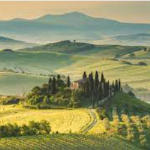

In [3]:
ita_group = source.groups.search("Italy Environment Data")[0]
ita_group

### Initialize Source GroupMigratonManager 

In [4]:
grp_mgr = GroupMigrationManager(ita_group)

### Create Export Package Job

In [5]:
ita_job = grp_mgr.create()

In [6]:
import time

while ita_job.status != "completed":
    job_status = ita_job.status
    if job_status == "failed":
        break
    else:
        print(job_status)
        time.sleep(5)
print(f"Job Status: {ita_job.status}")

processing
processing
processing
processing
Job Status: completed


### Inspect Job Results

In [7]:
ita_epk_item = ita_job.result()
ita_epk_item

<Item title:"Italy_Environment_Data_2023310_045033.epk" type:Export Package owner:jyaist_api>

In [8]:
grp_mgr.inspect(ita_epk_item)

{'packageSummary': {'id': '5c890049b69346cd84710501464feae4',
  'fileName': 'Italy_Environment_Data_2023310_045033',
  'packageVersion': '1.0',
  'packageCreated': 1678467033552,
  'sourcePortalInfo': {'httpsUrl': 'https://pythonapi.playground.esri.com/portal',
   'httpUrl': 'http://pythonapi.playground.esri.com/portal',
   'version': '10.9.1',
   'portalId': '6e63aa38-b315-4f86-81a4-364ce73c1996',
   'isPortal': True}},
 'total': 3,
 'start': 1,
 'num': 3,
 'nextStart': -1,
 'results': [{'id': '78dc0a60429e4286af67343c4e868a87',
   'type': 'Feature Service',
   'title': 'natural_features_ita',
   'size': 4218057,
   'exists': True,
   'canImport': True,
   'created': 1677342193609,
   'modified': 1677342282348},
  {'id': 'efc42793072541a3bfd7c5b83e018f61',
   'type': 'Feature Service',
   'title': 'streams_ita',
   'size': 1985949,
   'exists': True,
   'canImport': True,
   'created': 1677342346979,
   'modified': 1677342395207},
  {'id': '4be4460af8d3452da4ec4a3455519056',
   'type'

### Download the Export Package

In [9]:
down_res = ita_epk_item.download(save_path=r"/path/on/your/system",
                                 file_name=r"your_file_name.epk")
down_res

'/Users/john3092/data_formats/epk_pkgs/ita_download.epk'

### Add Export Package to Target organization

In [10]:
target_epk_item = target.content.add(item_properties={"title" : "ita_data_exp_pkg",
                                                      "tags" : "ITA, environment, hydrology",
                                                      "snippet": "Natural resource data for Italy.",
                                                      "type": "Export Package"},
                                     data=down_res)
target_epk_item

<Item title:"ita_data_exp_pkg" type:Export Package owner:gis_action>

### Search for target org Group for which to import content

<Group title:"Italy Natural Environment" owner:gis_action>
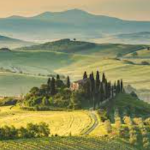

In [11]:
target_grp = target.groups.search("Italy Natural Environment")[0]
target_grp

In [12]:
target_grp.id

'1d464bc037ff48efadb4e74bb3b762de'

### Initialize Target GroupMigrationManager

In [13]:
target_grp_mgr = GroupMigrationManager(target_grp)

### Load the Group content into the Target

In [14]:
target_epk_job = target_grp_mgr.load(epk_item=target_epk_item)

In [15]:
import time

while target_epk_job.status != "completed":
    job_status = target_epk_job.status
    if job_status == "failed":
        break
    else:
        print(job_status)
        time.sleep(5)
print(f"Job Status: {target_epk_job.status}")

processing
processing
processing
processing
processing
processing
processing
Job Status: completed


In [16]:
target_epk_job.messages

["Starting import of items from EPK item 'a64d759907cd49a08e406128415297ea' to group 'Italy Natural Environment'.",
 "Starting the import of exported package item 'a64d759907cd49a08e406128415297ea' containing 3 items.",
 "Import option to overwrite items if they exist is set to 'true'."]

In [17]:
target_epk_job.result()

{'itemsImported': [<Item title:"natural_features_ita" type:Feature Layer Collection owner:gis_action>,
  <Item title:"streams_ita" type:Feature Layer Collection owner:gis_action>,
  <Item title:"Italian Natural Data" type:Web Map owner:gis_action>],
 'itemsSkipped': [],
 'itemsFailedImport': []}